In [8]:
#Importanto bibliotecas
import pandas as pd
import numpy as np
import os
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt


%matplotlib inline


#Upload dos dados
cadastro_df = pd.read_csv('cadastro - cadastro.csv', encoding='utf-8')
precos_df = pd.read_csv('preco da gasolina - preco da gasolina.csv', encoding='utf-8')
salario_df = pd.read_csv('salario_profissoes - salario_profissoes.csv', encoding='utf-8')
brasil_municipios_df = pd.read_csv('brasil_municipios.csv', encoding='utf-8')

#Apresentando apenas 3 linhas do dataframe
cadastro_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior


In [58]:
salario_df.head(3)

,Profissões,salario até 3 anos,salaior +3 anos
0,Cientista de Dados,10000,14000
1,dona de casa,1200,1200
2,desempregado,0,0


In [59]:
#Criando coluna com idade a partir do ano de nascimento:

cadastro_df['ano_nascimento'] = pd.to_numeric(cadastro_df['ano_nascimento'])

idade = 2021 - cadastro_df['ano_nascimento']

cadastro_df['idade'] = idade


#Qual a idade média das pessoas no cadastro ?

round(cadastro_df['idade'].mean(),2)

33.73

In [26]:
cadastro_df.head(3)


,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,idade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,36
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,51
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,31


In [27]:
#Quantos homens tem no cadastro ?

cadastro_homens_df  = cadastro_df[(cadastro_df['sexo'] == 'm')]
cadastro_homens_df.groupby(by='sexo').size()

sexo
m    16
dtype: int64

In [28]:
#Quantas mulheres tem no cadastro ?

cadastro_mulheres_df  = cadastro_df[(cadastro_df['sexo'] == 'f')]
cadastro_mulheres_df.groupby(by='sexo').size()

sexo
f    14
dtype: int64

In [29]:
# Qual a idade média dos homens e das mulheres ?
#round(cadastro_df['idade'].mean(),2)

idade_media_homens = round(cadastro_homens_df['idade'].mean(),2)
idade_media_mulheres = round(cadastro_mulheres_df['idade'].mean(),2)


print('A média de idade dos homens é: ', idade_media_homens, ' / A média de idade das mulheres é: ', idade_media_mulheres)

A média de idade dos homens é:  32.75  / A média de idade das mulheres é:  34.86


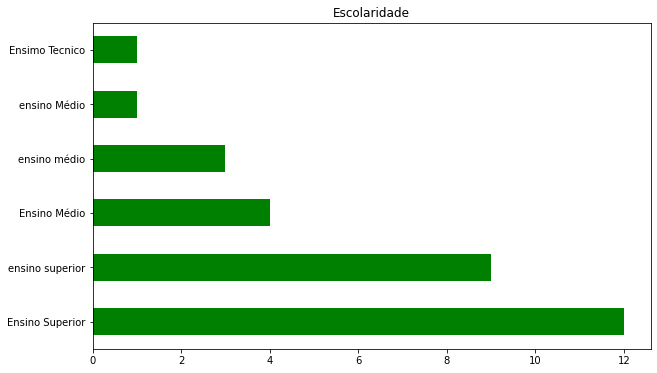

In [30]:
# Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro

cadastro_df['escolaridade'].value_counts()
plt.figure(figsize=(10, 6))
cadastro_df['escolaridade'].value_counts().plot(kind='barh',x='escolaridade',y='quantidade', color='green');
plt.title('Escolaridade')
plt.show()

In [31]:
# Mostre a Média Salarial do cadastro

cadastro_df.rename(columns={'profissão': 'Profissões'}, inplace = True)
salario_df.rename(columns={'salaior +3 anos': 'salario_maior_de_3_anos'}, inplace = True)
salario_df.rename(columns={'salario até 3 anos': 'salario_ate_3_anos'}, inplace = True)
cadastro_compl = pd.merge(cadastro_df, salario_df, on='Profissões')



def salario_respectivo(cadastro_compl):
    for cad in cadastro_compl['experiencia profissional']:
        if(cad <= 3):
            cadastro_compl['salario_respectivo'] = cadastro_compl['salario_ate_3_anos']
        else:
            cadastro_compl['salario_respectivo'] = cadastro_compl['salario_maior_de_3_anos']
    return cadastro_compl

cadastro_compl = salario_respectivo(cadastro_compl)

cadastro_compl.head(3)

round(cadastro_compl['salario_respectivo'].mean(),2)

3486.21

In [32]:
# Quem tem o maior salario?

print(cadastro_compl[['nome', 'Profissões','salario_respectivo' ]][cadastro_compl.salario_respectivo == cadastro_compl.salario_respectivo.max()])

     nome Profissões  salario_respectivo
9  Mirtes     Médica               12000


In [33]:
#Tirando desempregado, quem recebe menos ?

cadastro_compl = cadastro_compl[cadastro_compl['Profissões'] != "desempregado"]
#cadastro_compl = cadastro_compl[cadastro_compl['Profissões'] != "estagiario"]
#cadastro_compl = cadastro_compl[cadastro_compl['Profissões'] != "estudante"]

print(cadastro_compl[['nome', 'Profissões','salario_respectivo']][cadastro_compl.salario_respectivo == cadastro_compl.salario_respectivo.min()])

       nome Profissões  salario_respectivo
10   Camila  estudante                   0
11  Gabriel  estudante                   0


In [34]:
# Quantas pessoas gostam de caminhar no final de semana ?

esporte_df = cadastro_compl[(cadastro_compl['lazer_final_de_semana'] == 'caminhar')]
esporte_df.groupby(by='lazer_final_de_semana').size()

lazer_final_de_semana
caminhar    1
dtype: int64

In [35]:
esporte_df

,nome,sobrenome,ano_nascimento,sexo,cidade,Profissões,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,idade,salario_ate_3_anos,salario_maior_de_3_anos,salario_respectivo
5,Marta,da Silva,1983,f,São Caetano,Auxiliar de Enfermagem,2,Solteira,0,caminhar,sim,crossfit,4.0,não,Ensimo Tecnico,38,1500,4000,1500


Text(0.5, 1.0, 'Relação entre escolaridade e prática esporte')

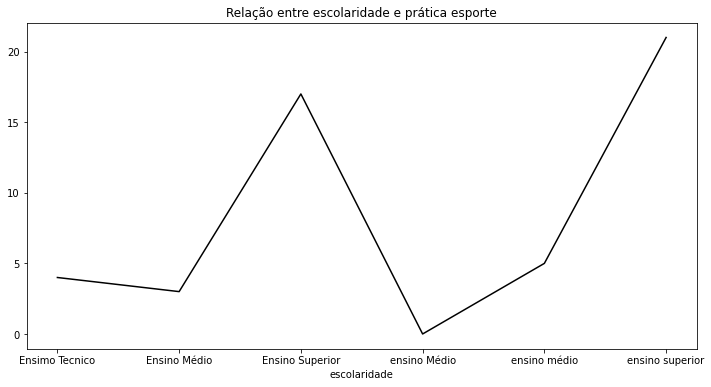

In [36]:
#Crie um gráfico mostrando a relação entre escolaridade e prática esporte


esporte_escolaridade = cadastro_compl.groupby('escolaridade')
plt.figure(figsize=(12, 6))
esporte_escolaridade.sum()['quanta_vezes_na_semana_pratica_esporte'].plot(kind='line',x='escolaridade',y='quantidade', color='black')
plt.title("Relação entre escolaridade e prática de esporte")

In [36]:
#Crie um mapa de calor

brasil_municipios_df.rename(columns={'municipio': 'cidade'}, inplace = True)

cadastro_with_coordinates = pd.merge(cadastro_df, brasil_municipios_df,  how = 'left', on='cidade')

cadastro_with_coordinates.head(25)

coordinates_df =  cadastro_with_coordinates.filter(items=['latitude','longitude'])

coordinates_df.dropna(subset = ["latitude",'longitude'], inplace=True)

map_calor = folium.Map([48., 5.], tiles='stamentoner', zoom_start=6)

HeatMap(coordinates_df).add_to(map_calor)

map_calor.save(os.path.join('Mapas', 'MapaDeCalor.html')) 

Text(0.5, 1.0, 'Distribuição por estado')

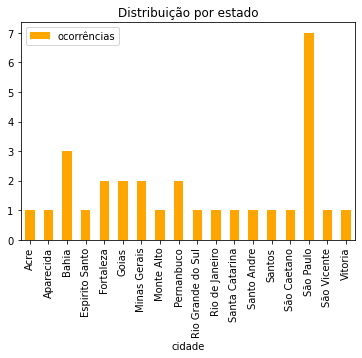

In [32]:
#Mostre de forma gráfica a distribuição de estados do cadastro

estados = cadastro_df.groupby(['cidade']).size().reset_index(name='ocorrências')

estados.plot(kind='bar',x='cidade',y='ocorrências', color='orange')

plt.title("Distribuição por estado")

